This notebook demonstrates the usage of the BoundaryFinder code, to find the boundary of the behaviour of a model where the behaviour is defined as a point in 2D.

In [3]:
import numpy as np
import sys, os, time
sys.path.append('../utilsGRF')
import BoundaryFinder as BF

In [41]:
#In all the examples, this will be fixed:

#Define the grid:
stp_ar=np.arange(0.2,1.2,0.005) #The mathematica files to check the results assume a grid spacing of 0.005. Change that if this is modified. 
pos_ar=np.arange(0.3,1.2,0.005)

minp=1e-3
maxp=1e3


defaultsettings={'pars_limit':[minp,maxp],
           'row_ar':stp_ar,
          'col_ar':pos_ar,
          'seed':1,
         'mat':None,
         'mat_pars':None}


defaultargs={'niters':5, #for testing purposes only 5 iterations, or it will take very long
      'niters_conv':100,
      'niters_conv_points':1000,
      'niters_save':2,
      'prob_par':0.5,
      'prob_replace':0.5,
      'extr_uniform':[-1,1],
      'L_project':10,
      'plotting':True,
      'verbose':True,
       'dofirstmutate':True,
      'dopullcentroids':True,
      'dopulltangents':True} 

# Universal boundary model with N=2, in python

Here I am making the code necessary to find position/steepness for the rational function of two degree 2 polynomials.

In [42]:
import sympy
a0,a1,a2,b0,b1,b2,x,halff=sympy.symbols("a0,a1,a2,b0,b1,b2,x,halff")

f=(a0+a1*x+a2*x**2)/(b0+b1*x+b2*x**2)
numf,denf=sympy.fraction(sympy.together(f-halff))
print("numf")
print(sympy.Poly(sympy.expand(numf),x).coeffs())
df=sympy.diff(f,x)
print("df")
print(df)
df2=sympy.diff(df,x)
#max derivative: second derivative==0, equivalent to numerator of second derivative==0
num,den=sympy.fraction(sympy.together(df2))
polynum=sympy.Poly(sympy.expand(num),x)
display(polynum)
print(polynum.coeffs())

numf
[a2 - b2*halff, a1 - b1*halff, a0 - b0*halff]
df
(a1 + 2*a2*x)/(b0 + b1*x + b2*x**2) + (-b1 - 2*b2*x)*(a0 + a1*x + a2*x**2)/(b0 + b1*x + b2*x**2)**2


Poly((2*a1*b2**2 - 2*a2*b1*b2)*x**3 + (6*a0*b2**2 - 6*a2*b0*b2)*x**2 + (6*a0*b1*b2 - 6*a1*b0*b2)*x - 2*a0*b0*b2 + 2*a0*b1**2 - 2*a1*b0*b1 + 2*a2*b0**2, x, domain='ZZ[a0,a1,a2,b0,b1,b2]')

[2*a1*b2**2 - 2*a2*b1*b2, 6*a0*b2**2 - 6*a2*b0*b2, 6*a0*b1*b2 - 6*a1*b0*b2, -2*a0*b0*b2 + 2*a0*b1**2 - 2*a1*b0*b1 + 2*a2*b0**2]


In [43]:
def getx05(pars):
    b0,a0, b1,a1,b2,a2=pars
    min_=10**10
    max_=0
    for x in np.logspace(-20,20,1000):
        f=(a0+a1*x+a2*x**2)/(b0+b1*x+b2*x**2)
        if f<min_:
            min_=f
        if f>max_:
            max_=f
    halff=min_+0.5*(max_-min_)
    roots=np.roots([a2 - b2*halff, a1 - b1*halff, a0 - b0*halff])
    roots=[x for x in roots if np.isreal(x) and x>0]
    if len(roots)>0:
        return roots[0]
    else:
        return None

def derivative_univN2(pars,x):
    b0,a0, b1,a1,b2,a2=pars
    return (a1 + 2*a2*x)/(b0 + b1*x + b2*x**2) + (-b1 - 2*b2*x)*(a0 + a1*x + a2*x**2)/(b0 + b1*x + b2*x**2)**2
    
def myfN2(pars):
    b0,a0, b1,a1,b2,a2=pars
    x05=getx05(pars)
    if x05 is None:
        return [None,None]
    roots=np.roots([2*a1*b2**2 - 2*a2*b1*b2, 6*a0*b2**2 - 6*a2*b0*b2, 6*a0*b1*b2 - 6*a1*b0*b2, -2*a0*b0*b2 + 2*a0*b1**2 - 2*a1*b0*b1 + 2*a2*b0**2])
    roots=[x for x in roots if np.isreal(x) and x>0]
    if len(roots)==0:
        return [None,None]
    else:
        derivatives=[derivative_univN2(pars,x) for x in roots]
        argmax=np.argmax(derivatives)
        position=roots[argmax]/x05
        steepness=derivatives[argmax]*x05
    return [position,steepness]
    
    

0,

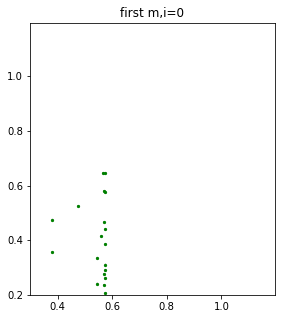

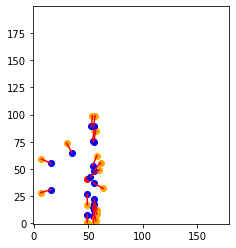

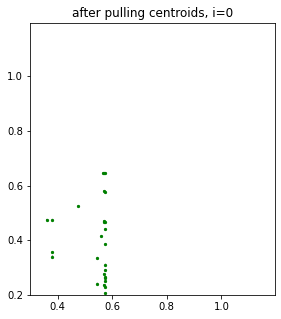

0 17.0.,1,

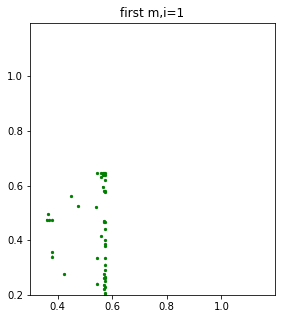

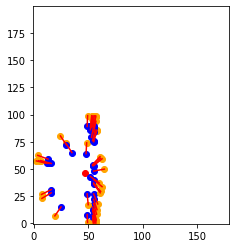

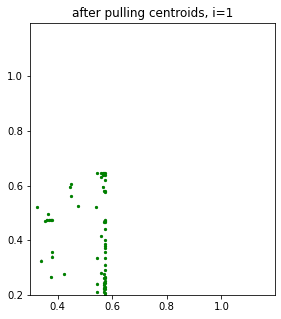

1 37.0.,2,

../utilsGRF/BoundaryFinder.py:836: ComplexWarning: Casting complex values to real discards the imaginary part
  self.pos_val[idx_s,idx_p]=p
../utilsGRF/BoundaryFinder.py:837: ComplexWarning: Casting complex values to real discards the imaginary part
  self.stp_val[idx_s,idx_p]=s


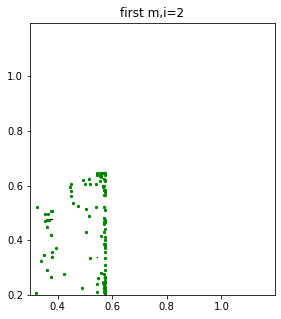

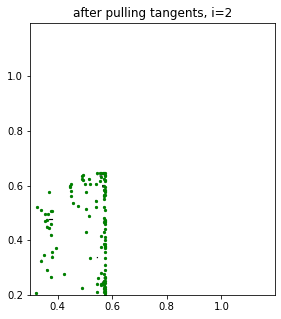

../utilsGRF/BoundaryFinder.py:879: ComplexWarning: Casting complex values to real discards the imaginary part
  distances[i]=d
../utilsGRF/BoundaryFinder.py:903: ComplexWarning: Casting complex values to real discards the imaginary part
  self.pos_val[idx_s,idx_p]=bestp
../utilsGRF/BoundaryFinder.py:904: ComplexWarning: Casting complex values to real discards the imaginary part
  self.stp_val[idx_s,idx_p]=bests


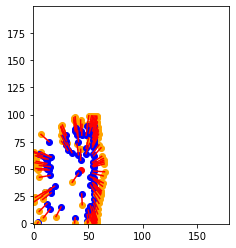

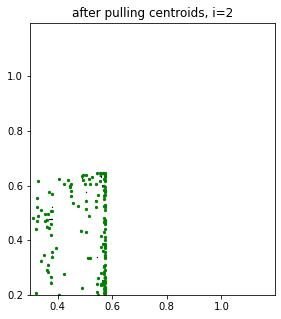

2 101.0.,3,

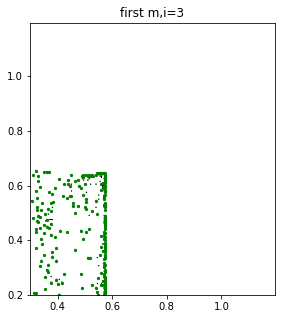

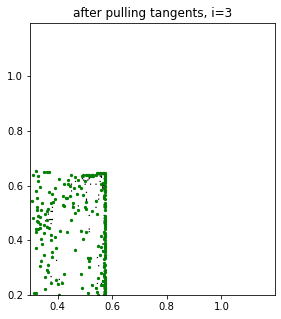

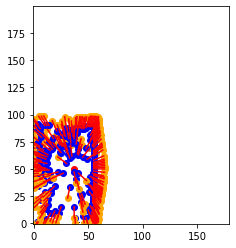

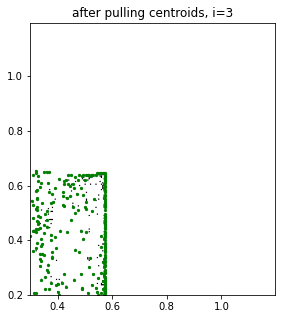

3 185.0.,4,

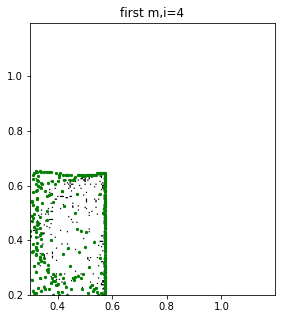

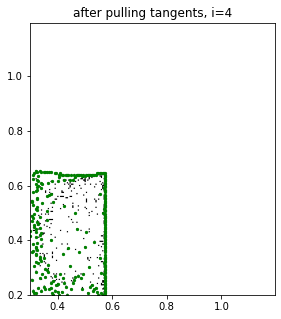

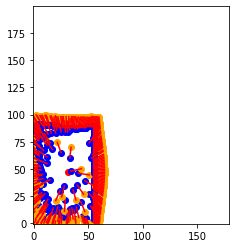

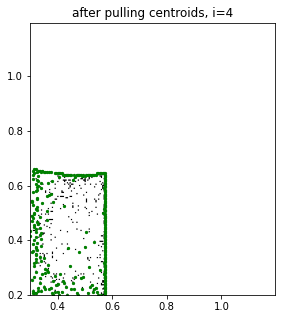

4 199.0.,5,

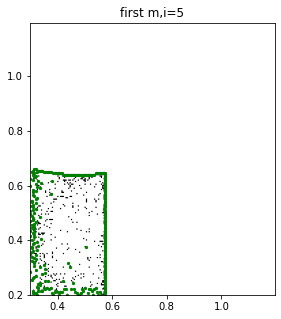

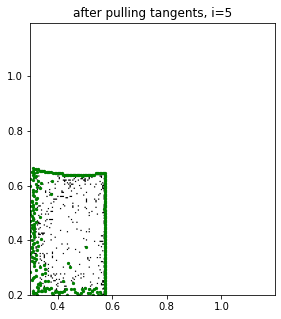

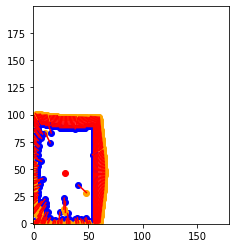

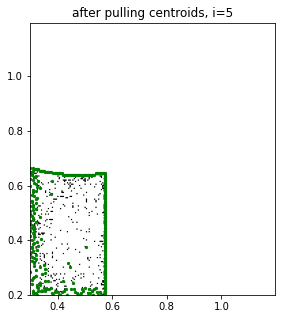

5 125.0.,6,

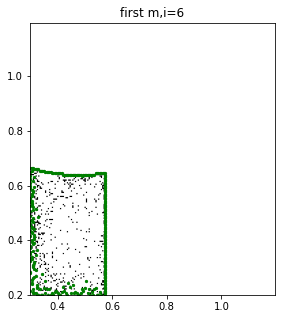

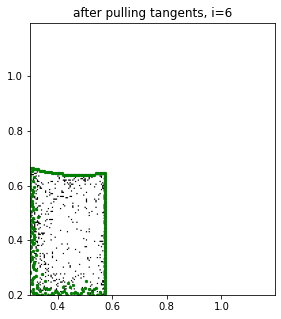

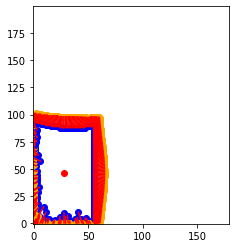

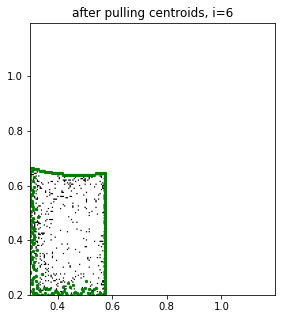

6 87.0.,7,

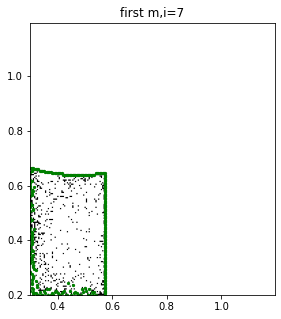

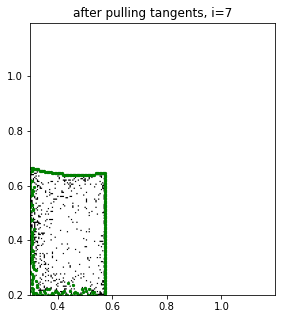

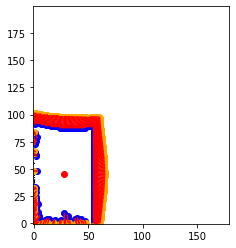

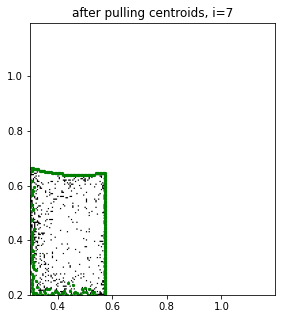

7 44.0.,8,

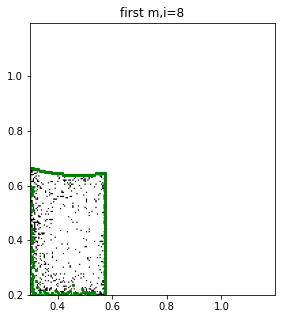

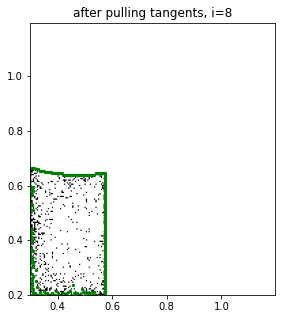

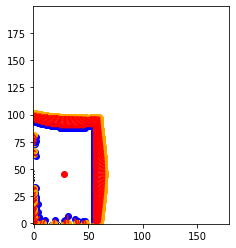

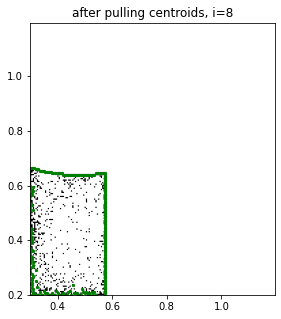

8 34.0.,9,

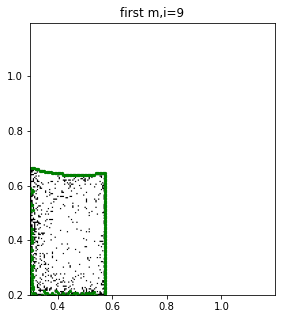

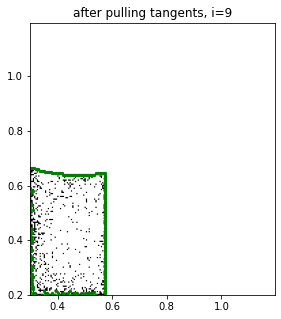

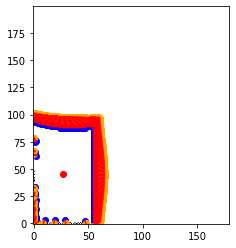

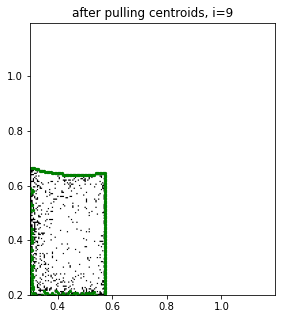

9 21.0.,10,

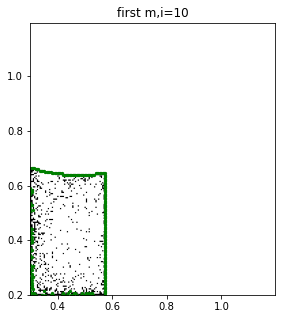

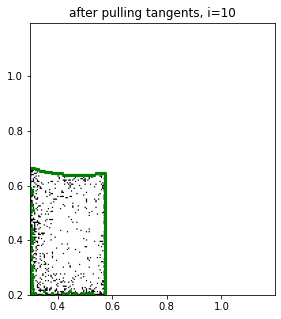

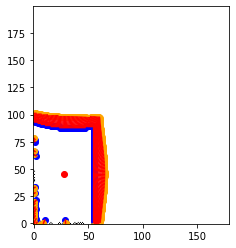

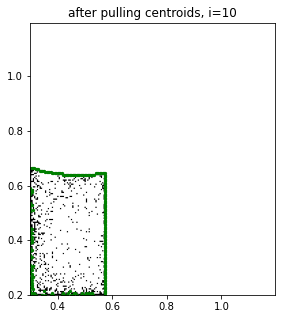

10 10.0.,11,

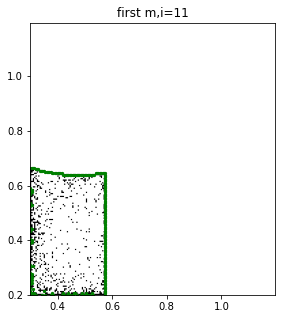

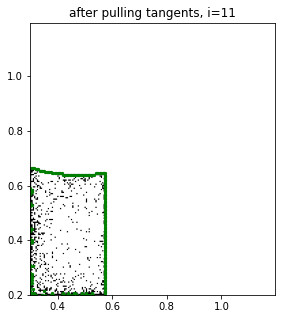

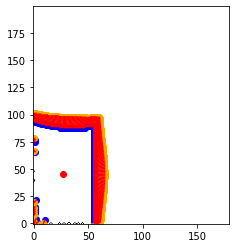

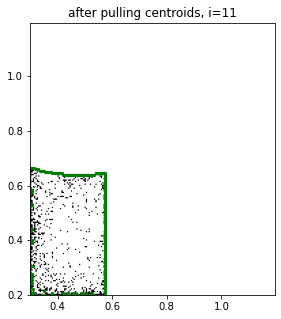

11 15.0.,12,

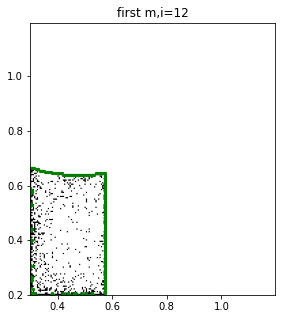

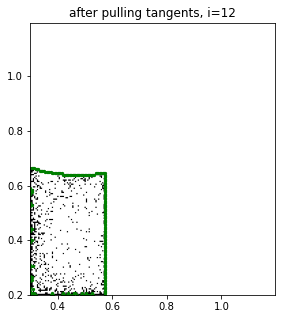

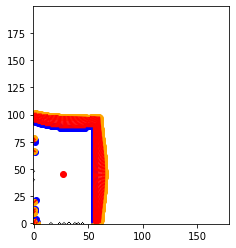

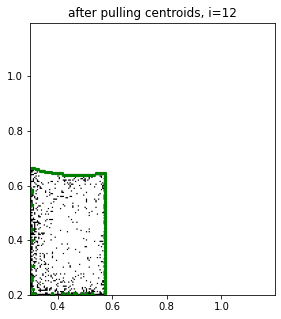

12 4.0.,13,

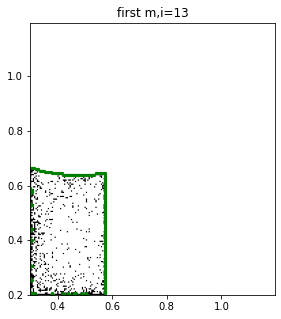

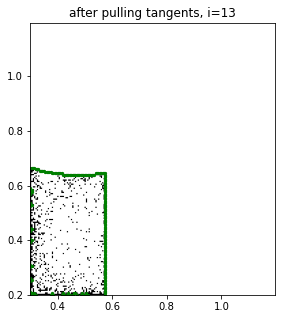

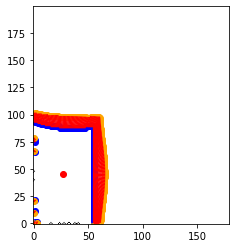

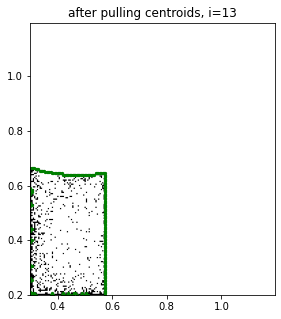

13 4.0.,14,

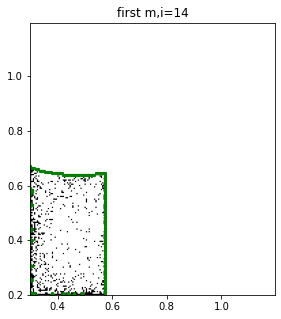

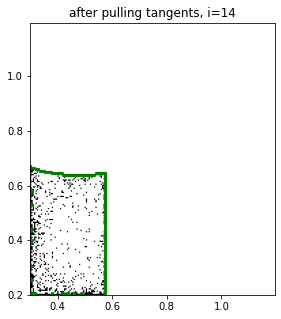

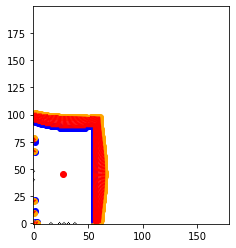

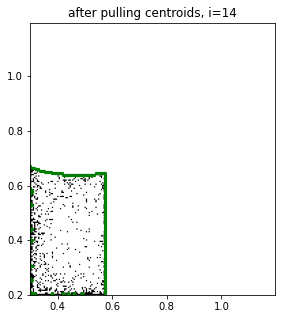

14 3.0.,15,

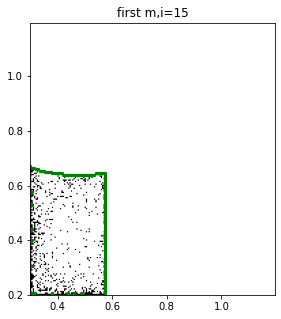

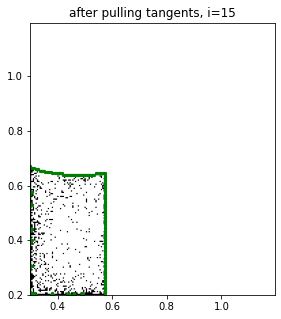

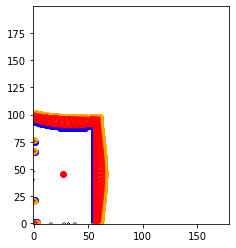

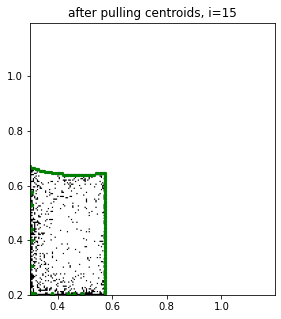

15 3.0.,16,

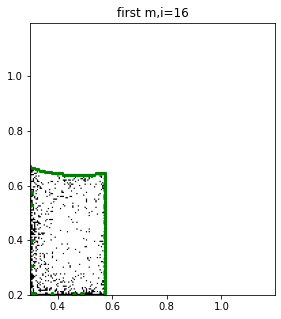

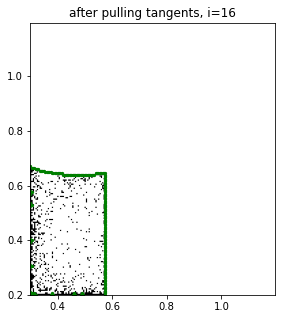

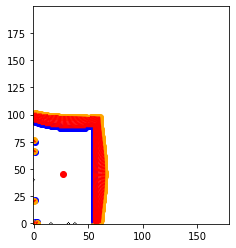

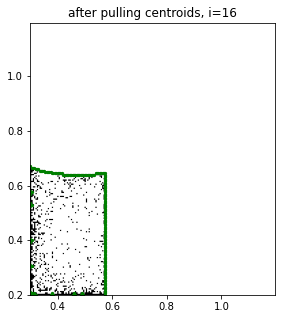

16 2.0.,17,

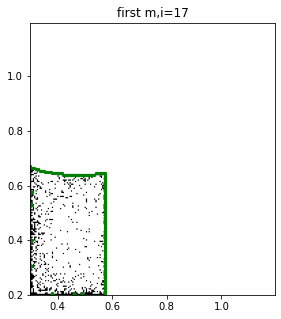

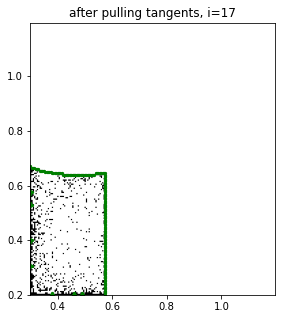

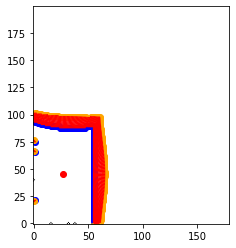

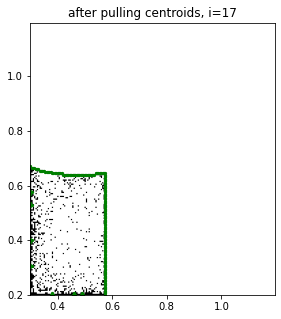

17 2.0.,18,

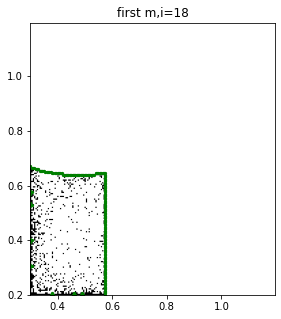

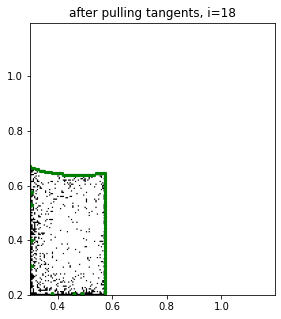

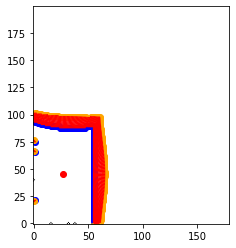

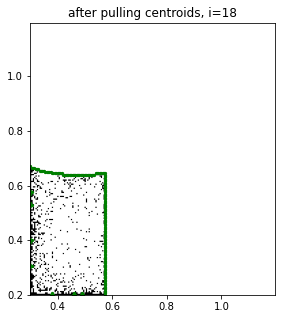

18 0.0.,19,

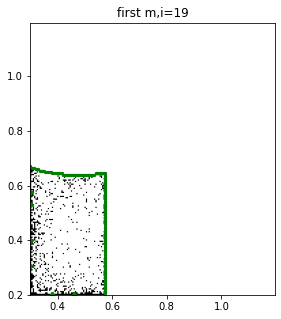

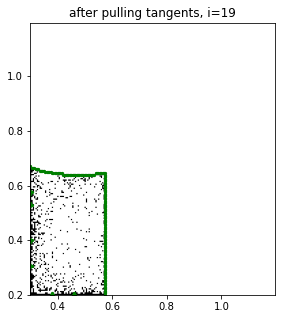

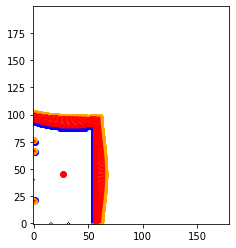

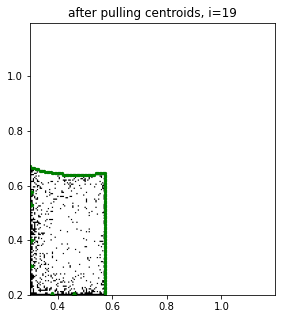

19 1.0.,

In [44]:
#code that runs the boundary exploration in the space given by the function myfN2
#set plotting:False in args dict when running for many iterations, so that no plots are shown
outfolder="test"
if not os.path.isdir(outfolder):
    os.mkdir(outfolder)
name_save="namesave"
outfolder_final=outfolder
name='%s_last'%(name_save)


settings=defaultsettings.copy()
constraints={1:{'target':0,'lt':1},3:{'target':2,'lt':1},5:{'target':4,'lt':1}} #the coefficients in the numerator are at most as large as the corresponding in the denominator

settings['constraints']=constraints
settings['compute_x_y_f']=myfN2
settings['npars']=6 

#Initialise and get first 10 points

BE=BF.BoundaryExplorer(**settings)
BE.get_initial_points(10)

#Extend boundary

args=defaultargs.copy()
args["niters"]=20 #just for testing purposes
args['folder_save']=outfolder
args['name_save']=name_save
BE.extend_boundary(**args)


np.save(os.path.join(outfolder_final,'mat_'+name+'.npy'),BE.mat)
np.save(os.path.join(outfolder_final,'mat_pars_'+name+'.npy'),BE.mat_pars)




In [ ]:
plt.imshow(BE.mat,origin=lower,extent=[pos_ar[0],pos_ar[-1],stp_ar[0],stp_ar[-1]],cmap=plt.cm.Greys)
plt.show()

# Binding site model with 5 binding sites, running pos-stp computation in cpp (pybind interface).

In [3]:
sys.path.append('./TFbinding')
import N4an
def myfN4an(pars):
    #Boundary finder is expecting either the correct result or None, so this function allows this. At this moment I don´t know how to return None with pybind.
    out=[None,None]
    result=N4an.interfaceps_a_GRF_N4an_x(pars)
    #print(result)
    if result[0]>0:
        out=[result[0],result[1]]
    return out

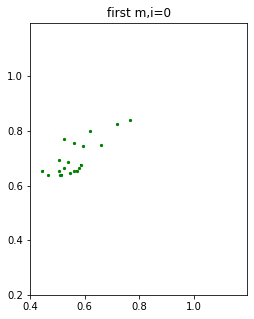

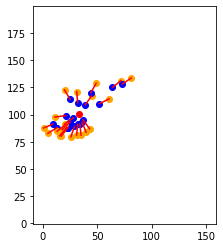

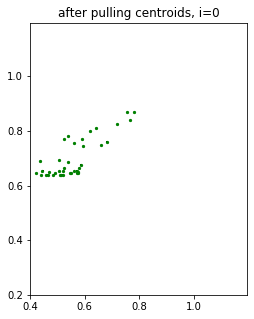

0 29.0.,

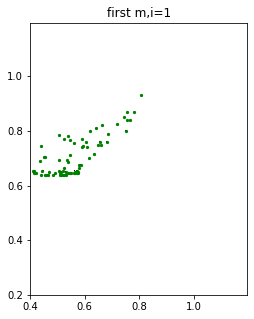

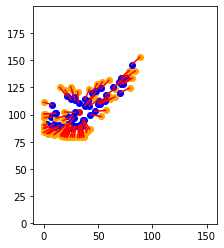

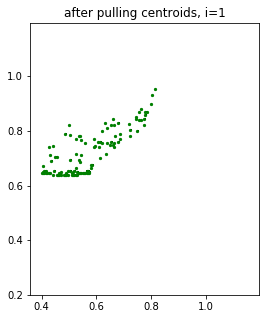

1 77.0.,

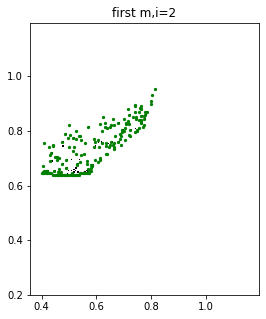

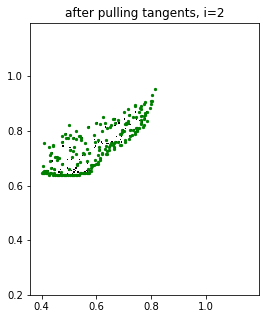

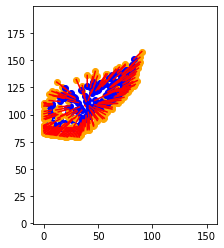

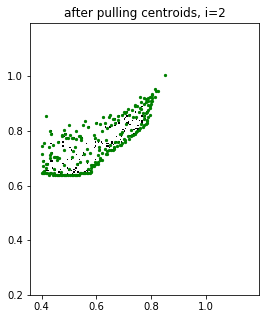

2 209.0.,

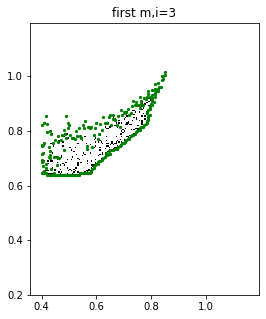

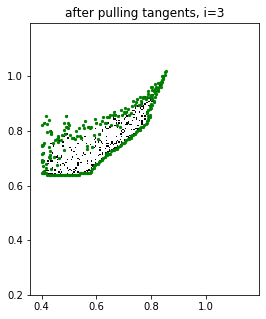

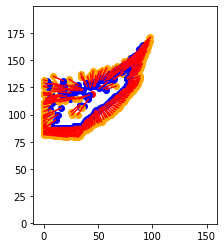

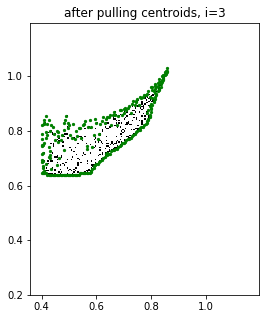

3 237.0.,

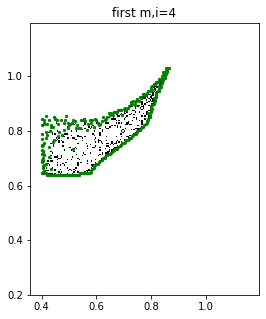

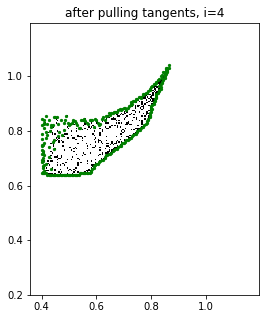

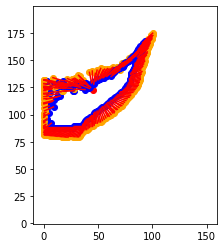

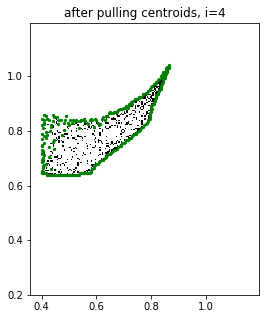

4 182.0.,time difference 334.7612421512604
False


In [5]:
#N4 all or nothing, all cooperativities

name_save='example'
outfolder='TFbinding/exampleBFN4an'

if not os.path.isdir(outfolder):
    os.mkdir(outfolder)

constraintdict={0:{'fixed':1,'min':1,'max':1}} #K1=1 is fixed

settings=defaultsettings.copy()
settings['constraints']=constraintdict
settings['compute_x_y_f']=myfN4an
settings['npars']=15 #this can be obtained by opening the .cpp files and see how many parameters are there

#Initialise and get first 10 points
ti=time.time()
BE=BF.BoundaryExplorer(**settings)
BE.get_initial_points(10)

#Extend boundary
args=defaultargs.copy()
args['folder_save']=outfolder
args['name_save']=name_save
BE.extend_boundary(**args)

#Save final results
name='%s_last'%(name_save)
outfolder_final=outfolder
np.save(os.path.join(outfolder_final,'mat_'+name+'.npy'),BE.mat)
np.save(os.path.join(outfolder_final,'mat_pars_'+name+'.npy'),BE.mat_pars)

te=time.time()
print('time difference',te-ti)   
print(BE.converged)

# TF binding model with Pol

In [2]:
sys.path.append('./TFbindingP')
import N5P
def myfN5P(pars):
    #Boundary finder is expecting either the correct result or None, so this function allows this. At this moment I don´t know how to return None with pybind.
    out=[None,None]
    result=N5P.interfaceps_a_GRF_N5P_x(pars,np.array([1]))
    #print(result)
    if result[0]>0:
        out=[result[0],result[1]]
    return out

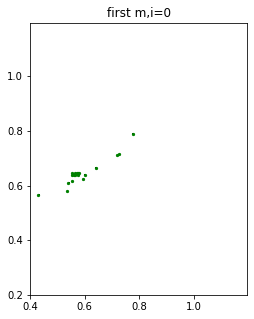

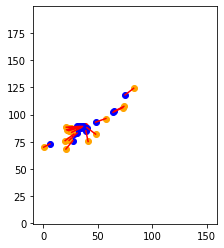

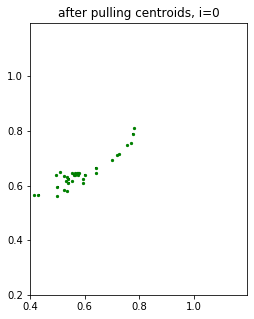

0 25.0.,

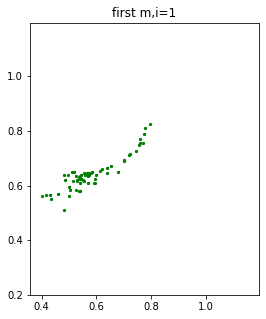

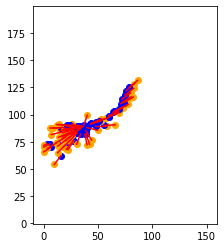

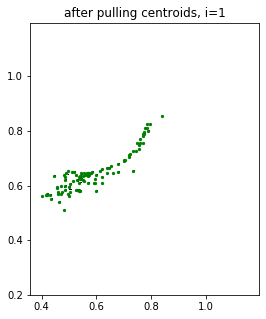

1 76.0.,

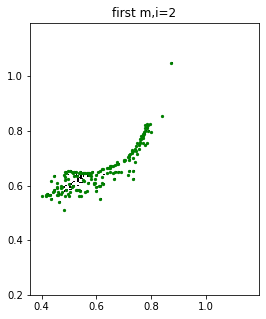

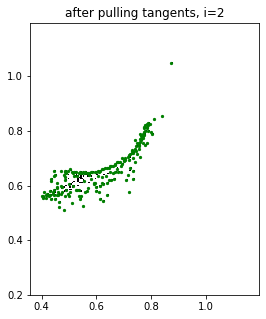

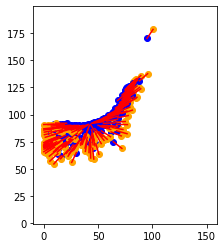

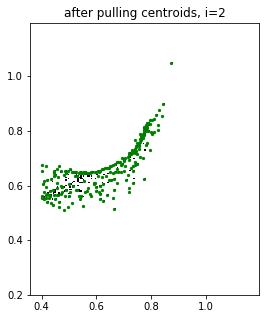

2 213.0.,

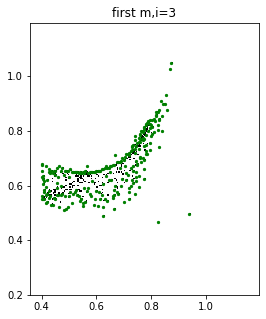

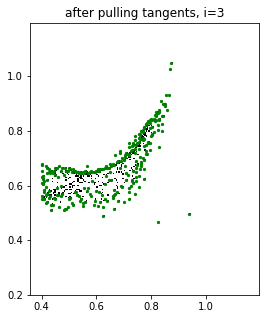

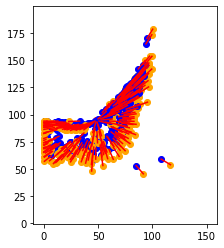

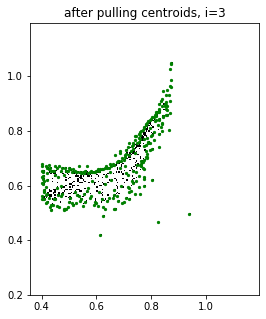

3 275.0.,

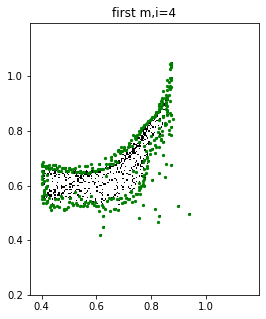

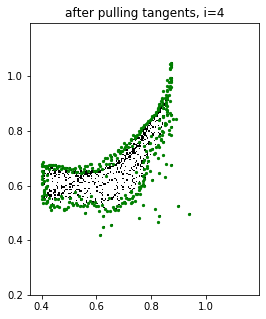

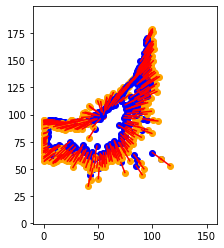

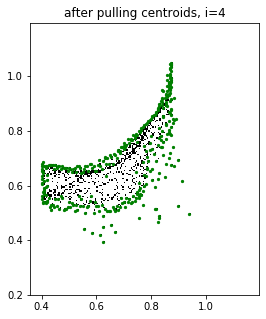

4 331.0.,time difference 586.3078289031982
False


In [8]:
#For the Pol model, pol cooperativities are >=1. Use the following constraints:

wpidx0=36 #index of the first parameter that corresponds to a cooperativity with polymerase (check .cpp file to see this)
wpidx1=61 #index of the last parameter that corresponds to a cooperativity with polymerase
constraintdict={x:{'min':1,'max':maxp} for x in range(wpidx0,wpidx1+1)} #constraints for polymerase cooperativities
constraintdict[0]={'fixed':1,'min':1,'max':1} #fixed constraint


name_save='exampleTFP'
outfolder='./TFbindingP/exampleBF'

if not os.path.isdir(outfolder):
    os.mkdir(outfolder)



settings=defaultsettings.copy()
settings['constraints']=constraintdict
settings['compute_x_y_f']=myfN5P
settings['wpindices']=[wpidx0,wpidx1] #this and the setting below is for the Pol model only
settings['nsites']=5
settings['npars']=62 #this can be obtained by opening the .cpp files and see how many parameters are there

#Initialise and get first 10 points
ti=time.time()
BE=BF.BoundaryExplorer(**settings)
BE.get_initial_points(10)

#Extend boundary
args=defaultargs.copy()
args['folder_save']=outfolder
args['name_save']=name_save
BE.extend_boundary(**args)

#Save final results
name='%s_last'%(name_save)
outfolder_final=outfolder
np.save(os.path.join(outfolder_final,'mat_'+name+'.npy'),BE.mat)
np.save(os.path.join(outfolder_final,'mat_pars_'+name+'.npy'),BE.mat_pars)

te=time.time()
print('time difference',te-ti)   
print(BE.converged)

# Two conformation model, other constraint examples

In [6]:
sys.path.append('./btwoconf')
import bs2c2av
def myfbs2c2(pars):
    #Boundary finder is expecting either the correct result or None, so this function allows this. At this moment I don´t know how to return None with pybind.
    out=[None,None]
    #for pnum, par in enumerate(pars):
    #    print(par,end=',')
    #print('')
    result=bs2c2av.interfaceps_a_GRF_bs2c2av_x(pars)
    #print(result)
    if result[0]>0:
        out=[result[0],result[1]]
    return out

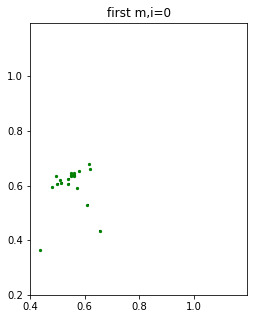

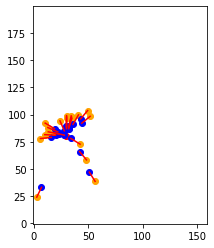

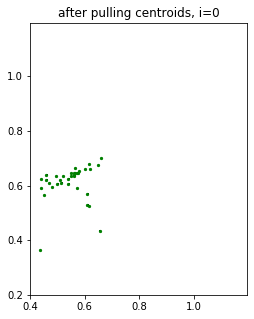

0 26.0.,

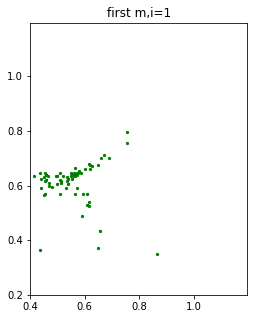

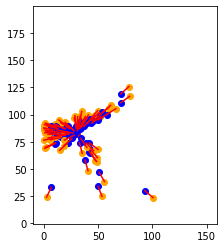

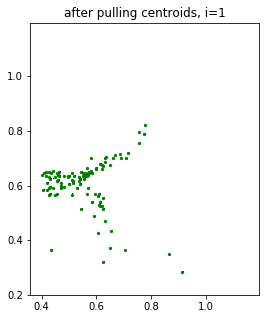

1 75.0.,

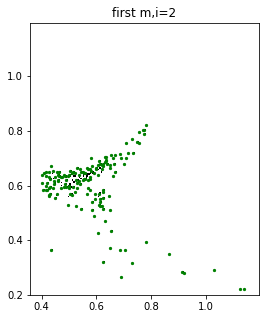

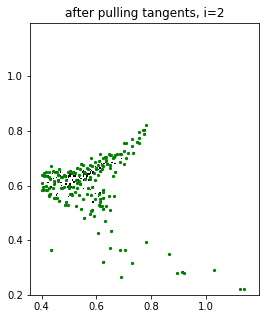

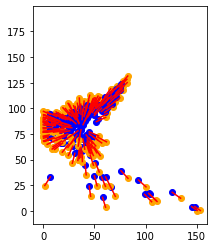

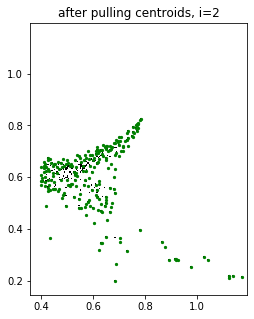

2 230.0.,

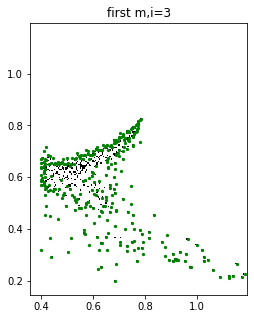

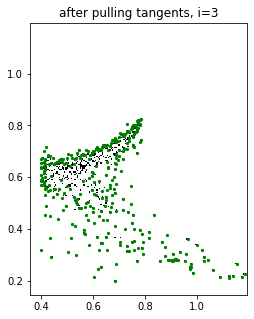

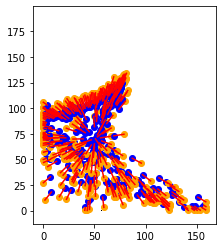

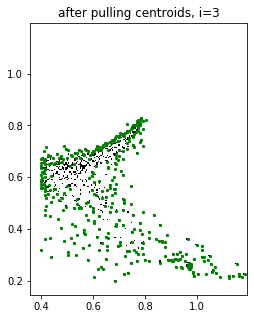

3 385.0.,

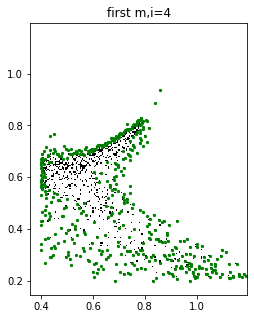

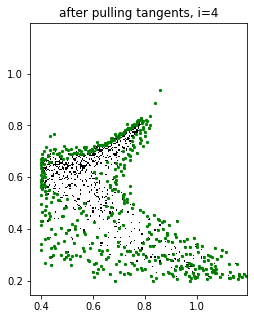

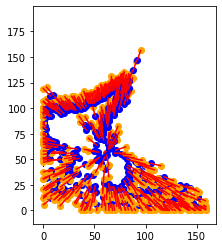

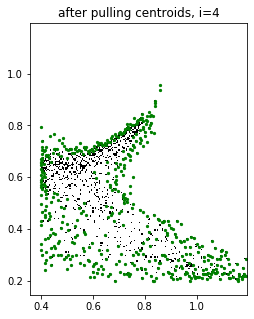

4 480.0.,time difference 996.7717649936676
False


In [7]:

name_save='exampletwoconf'
outfolder='./btwoconf/exampleBF'

if not os.path.isdir(outfolder):
    os.mkdir(outfolder)

constraintdict={2:{'target':0,'fcd':0.1,'fcu':10}, #parameter with index 2 is in a 10x lower-higher range of parameter with index 0
               3:{'target':1,'gt':1}, #parameter with index 3 is greater than parameter with index 1
               6:{'target':4,'lt':1}, #parameter with index 6 is lower than parameter with index 4
               } 

settings=defaultsettings.copy()
settings['constraints']=constraintdict
settings['compute_x_y_f']=myfbs2c2
settings['npars']=24

#Initialise and get first 10 points
ti=time.time()
BE=BF.BoundaryExplorer(**settings)
BE.get_initial_points(10)

#Extend boundary
args=defaultargs.copy()
args['folder_save']=outfolder
args['name_save']=name_save
BE.extend_boundary(**args)

#Save final results
name='%s_last'%(name_save)
outfolder_final=outfolder
np.save(os.path.join(outfolder_final,'mat_'+name+'.npy'),BE.mat)
np.save(os.path.join(outfolder_final,'mat_pars_'+name+'.npy'),BE.mat_pars)

te=time.time()
print('time difference',te-ti)   
print(BE.converged)

In [3]:
pars=np.array([3.5388446613421465,1000.0,15.851303175073912,1000.0,21.417636230689855,0.06042844624032376,0.6832815701885009,0.001,0.001,0.001,0.5758933028059618,0.001,0.01609392819549185,0.001,0.001,0.001,0.001,0.001,8.390134306353167,5.450502543761665,0.001,0.00270440799409399,0.19783168759715544,0.001])
myfbs2c2(pars)

3.5388446613421465,1000.0,15.851303175073912,1000.0,21.417636230689855,0.06042844624032376,0.6832815701885009,0.001,0.001,0.001,0.5758933028059618,0.001,0.01609392819549185,0.001,0.001,0.001,0.001,0.001,8.390134306353167,5.450502543761665,0.001,0.00270440799409399,0.19783168759715544,0.001,


[0.5723776869501698, 0.4813252376535701]